In [1]:
import numpy as np 
import igraph as ig
import leidenalg as la
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import normalized_mutual_info_score

iter = 2

data_path = 'dataset/tc11.dat'

data = np.loadtxt(data_path).astype(int)
graph = ig.Graph(data, directed=False)
partition = la.find_partition(graph, la.ModularityVertexPartition, n_iterations=iter, seed=7777,)
vertices = graph.vcount()

# answer = pd.read_csv(label_path, sep='\t', header=None)
# labels = answer[1].values

print(f"{len(partition)} clusters found")
print(f"Number of vertexes: {vertices}")

93 clusters found
Number of vertexes: 10001


In [2]:
# pred_labels = [0] * (vertices - 1)
# for id, nodes in enumerate(partition):
#     for node in nodes:
#         pred_labels[node - 1] = id

# pred_labels = np.array(pred_labels)
# original_nmi = normalized_mutual_info_score(answer[1], pred_labels)

original_modularity = partition.modularity
# print(f"Original NMI: {original_nmi}")
print(f"Original modularity: {original_modularity}")

Original modularity: 0.8343238362153066


In [3]:
cluster_set = []

n_of_valid_vertices = 0
for cluster_index, cluster_vertices in tqdm(enumerate(partition), total=len(partition)):
    new_graph = []
    for index in range(len(data)):
        node1, node2 = data[index]
        # assert node1 != node2
        if node1 in cluster_vertices and node2 in cluster_vertices:
            new_graph.append([node1, node2])

    new_graph = np.array(new_graph)
    unique_nodes, count = np.unique(new_graph, return_counts=True)
    
    # Mapping
    old2new = {}
    new2old = {}
    for i, node in enumerate(unique_nodes):
        old2new[node] = i
        new2old[i] = node
        
    new_vertices = np.array([[old2new[node1], old2new[node2]] for node1, node2 in new_graph])
    if len(new_vertices) == 0:
        print(f'{cluster_index} is empty')
        continue
    
    if np.random.rand() >= 0.5:
        cluster_set.append(list(cluster_vertices))
        continue
    
    # Generate sub-graphs
    new_graph = ig.Graph(new_vertices, directed=False)
    sub_partition = la.find_partition(new_graph, la.ModularityVertexPartition, n_iterations=iter, seed=7777)
    print(sub_partition.modularity)
    n_of_valid_vertices += len(cluster_vertices)

    # if len(unique_nodes) != len(cluster_vertices):
    #     print(list(unique_nodes))
    #     print(cluster_vertices)

    check_assert_list = []
    for index, sub_vertices in enumerate(sub_partition):
        old_sub_vertices = []
        for new_vertex in sub_vertices:
            old_sub_vertices.append(new2old[new_vertex])
        check_assert_list.extend(old_sub_vertices)
        if len(old_sub_vertices) != 0:
            cluster_set.append(old_sub_vertices)

    #     assert len(old_sub_vertices) != 0
    
    # check_assert = False
    # assert len(check_assert_list) == len(list(old2new.keys()))
    # for node1, node2 in zip(sorted(check_assert_list), sorted(list(old2new.keys()))):
    #     assert node1 == node2
        

  0%|          | 0/93 [00:00<?, ?it/s]

  1%|          | 1/93 [00:01<01:33,  1.02s/it]

0.16221899215961882


  2%|▏         | 2/93 [00:02<01:34,  1.04s/it]

0.1147362086284408


  4%|▍         | 4/93 [00:03<01:27,  1.01it/s]

0.2174717777344422


  5%|▌         | 5/93 [00:04<01:25,  1.03it/s]

0.13642818376501004


  6%|▋         | 6/93 [00:05<01:23,  1.04it/s]

0.14004855542609096


 10%|▉         | 9/93 [00:08<01:19,  1.06it/s]

0.12630073559962307


 13%|█▎        | 12/93 [00:11<01:13,  1.11it/s]

0.17384009793131328


 15%|█▌        | 14/93 [00:13<01:13,  1.08it/s]

0.10019425726947127


 17%|█▋        | 16/93 [00:15<01:11,  1.08it/s]

0.10627614164138635


 19%|█▉        | 18/93 [00:16<01:05,  1.15it/s]

0.17175099794049412


 22%|██▏       | 20/93 [00:18<01:00,  1.22it/s]

0.18880054604486424


 25%|██▍       | 23/93 [00:20<00:54,  1.27it/s]

0.13823128040821162


 28%|██▊       | 26/93 [00:22<00:50,  1.33it/s]

0.15095049130763416


 30%|███       | 28/93 [00:24<00:47,  1.38it/s]

0.1816999487184312


 31%|███       | 29/93 [00:24<00:46,  1.39it/s]

0.12307844001640983


 35%|███▌      | 33/93 [00:27<00:39,  1.53it/s]

0.15286567160566442


 38%|███▊      | 35/93 [00:28<00:36,  1.59it/s]

0.2256908872092967


 40%|███▉      | 37/93 [00:29<00:34,  1.63it/s]

0.1724690192130084


 42%|████▏     | 39/93 [00:31<00:32,  1.67it/s]

0.13826766792397527


 48%|████▊     | 45/93 [00:34<00:26,  1.83it/s]

0.5781095295227667


 49%|████▉     | 46/93 [00:34<00:25,  1.85it/s]

0.19897091907510298


 51%|█████     | 47/93 [00:35<00:26,  1.75it/s]

0.14427080388888297


 52%|█████▏    | 48/93 [00:36<00:25,  1.79it/s]

0.1438965347275844


 53%|█████▎    | 49/93 [00:36<00:24,  1.82it/s]

0.38628746528775254


 54%|█████▍    | 50/93 [00:37<00:23,  1.81it/s]

0.3722706866646261


 56%|█████▌    | 52/93 [00:38<00:21,  1.89it/s]

0.13876303185312988


 58%|█████▊    | 54/93 [00:39<00:19,  1.95it/s]

0.30177588048915815


 65%|██████▍   | 60/93 [00:42<00:15,  2.08it/s]

0.3729253466293286


 66%|██████▌   | 61/93 [00:42<00:15,  2.10it/s]

0.33089729542964436


 67%|██████▋   | 62/93 [00:42<00:14,  2.10it/s]

0.1816942438578472


 68%|██████▊   | 63/93 [00:43<00:14,  2.14it/s]

0.32153963439716116


 70%|██████▉   | 65/93 [00:44<00:12,  2.19it/s]

0.17857363533648757


 76%|███████▋  | 71/93 [00:46<00:10,  2.20it/s]

0.2720511840483202


 77%|███████▋  | 72/93 [00:47<00:09,  2.26it/s]

0.4803046289532775


 78%|███████▊  | 73/93 [00:47<00:08,  2.26it/s]

0.40791611094011826


 83%|████████▎ | 77/93 [00:49<00:06,  2.47it/s]

0.12385947244533957


 86%|████████▌ | 80/93 [00:50<00:04,  2.65it/s]

0.45515437164218875


 88%|████████▊ | 82/93 [00:51<00:03,  2.75it/s]

0.16338888888888883


 89%|████████▉ | 83/93 [00:51<00:03,  2.82it/s]

0.13035215318869162


 92%|█████████▏| 86/93 [00:52<00:02,  2.95it/s]

0.23080803195091282


 95%|█████████▍| 88/93 [00:53<00:01,  3.02it/s]

0.18395877089681792


 96%|█████████▌| 89/93 [00:53<00:01,  3.08it/s]

0.26230912339516294


 97%|█████████▋| 90/93 [00:53<00:00,  3.14it/s]

0.4592647699230658


 98%|█████████▊| 91/93 [00:54<00:00,  3.20it/s]

0.23988369857747022


100%|██████████| 93/93 [00:54<00:00,  1.71it/s]

92 is empty


In [4]:
print(f"Found clusters: {len(cluster_set)}")
total_nodes = 0
for index, cluster in enumerate(cluster_set):
    total_nodes += len(cluster)
print(f"Total nodes: {total_nodes}")

Found clusters: 237
Total nodes: 10000


<BarContainer object of 237 artists>

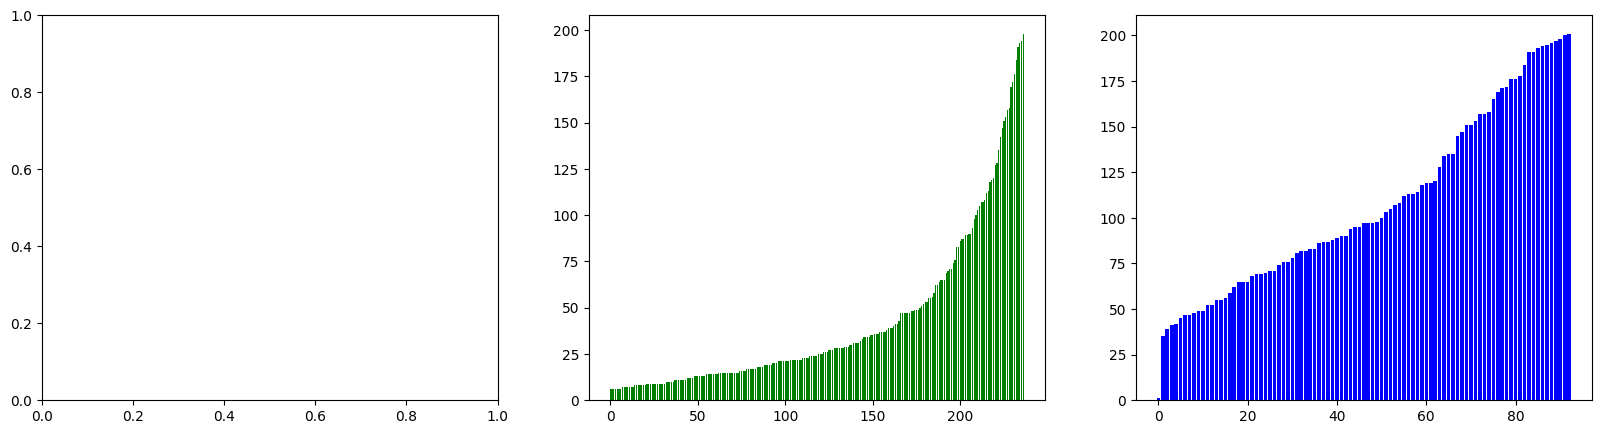

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
counts = sorted([len(cluster) for cluster in partition])
axes[2].bar(range(len(counts)), counts, color='b')

counts = sorted([len(cluster) for cluster in cluster_set])
axes[1].bar(range(len(counts)), counts, color='g')

# unique, counts = np.unique(labels, return_counts=True)
# counts = sorted(counts)
# axes[0].bar(range(len(counts)), counts, color='r')



In [6]:
pred_labels = [0] * total_nodes
for id, nodes in enumerate(cluster_set):
    for node in nodes:
        pred_labels[node - 1] = id

pred_labels = np.array(pred_labels)
# sub_nmi = normalized_mutual_info_score(answer[1], pred_labels)
# print(f"Ori NMI: {original_nmi}")
# print(f"Sub NMI: {sub_nmi}")

# print("Improvement: ", sub_nmi - original_nmi, "Percentage: ", (sub_nmi - original_nmi) / original_nmi * 100)
print(f"Original modularity: {original_modularity}")

Original modularity: 0.8343238362153066
